In [1]:
import pandas as pd

dataset = pd.read_parquet('../eval_datasets/09:53 06.05.2024.parquet')

dataset_2 = pd.read_parquet('../eval_datasets/15:36 03.05.2024.parquet')

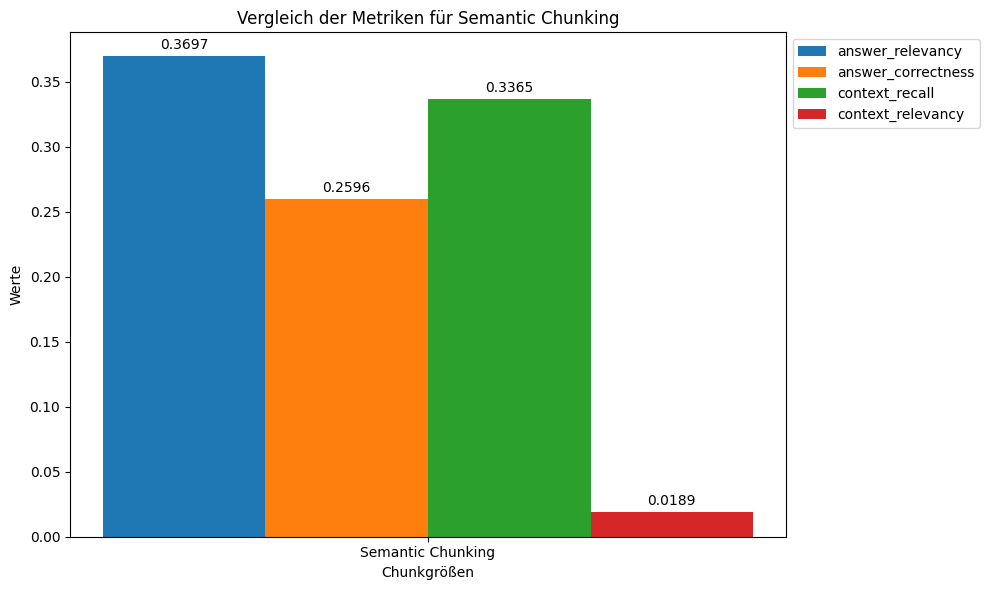

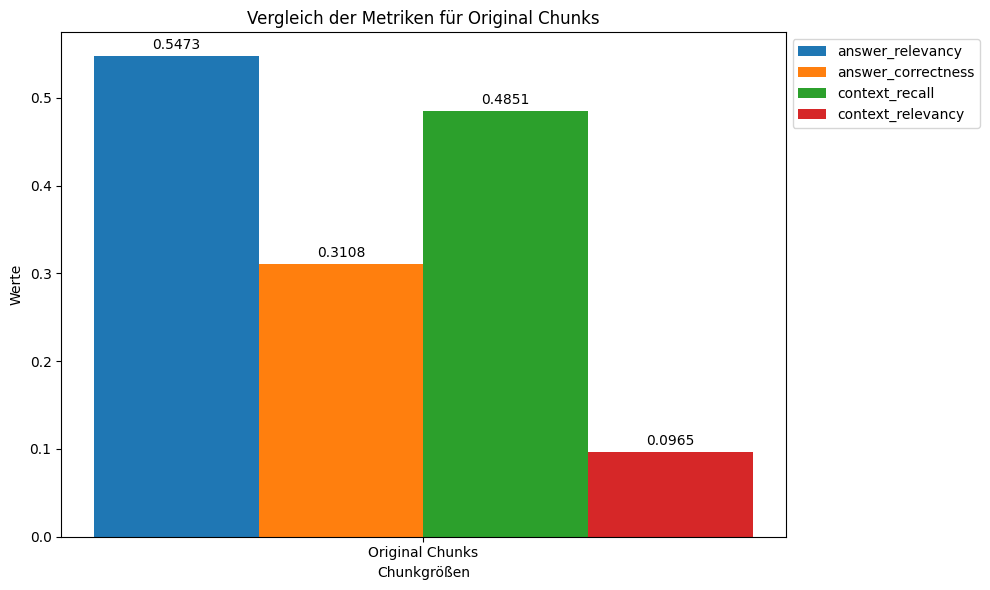

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the semantic chunking
chunk_sizes_semantic = ['Semantic Chunking']
answer_relevancy_semantic = [0.3697]
answer_correctness_semantic = [0.2596]
context_recall_semantic = [0.3365]
context_relevancy_semantic = [0.0189]

# Data for the original chunks
chunk_sizes_original = ['Original Chunks']
answer_relevancy_original = [0.5473]
answer_correctness_original = [0.3108]
context_recall_original = [0.4851]
context_relevancy_original = [0.0965]

def plot_with_annotations(chunk_sizes, answer_relevancy, answer_correctness, context_recall, context_relevancy, title, file_name):
    x_axis = np.arange(len(chunk_sizes))
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x_axis - 1.5 * bar_width, answer_relevancy, width=bar_width, label='answer_relevancy')
    bars2 = ax.bar(x_axis - 0.5 * bar_width, answer_correctness, width=bar_width, label='answer_correctness')
    bars3 = ax.bar(x_axis + 0.5 * bar_width, context_recall, width=bar_width, label='context_recall')
    bars4 = ax.bar(x_axis + 1.5 * bar_width, context_relevancy, width=bar_width, label='context_relevancy')
    
    # Add text annotations
    for bars in [bars1, bars2, bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.xticks(x_axis, chunk_sizes)
    plt.xlabel('Chunkgrößen')
    plt.ylabel('Werte')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

# Plot for semantic chunking
plot_with_annotations(chunk_sizes_semantic, answer_relevancy_semantic, answer_correctness_semantic, context_recall_semantic, context_relevancy_semantic, 'Vergleich der Metriken für Semantic Chunking', 'semantic_chunking_wide.png')

# Plot for original chunks
plot_with_annotations(chunk_sizes_original, answer_relevancy_original, answer_correctness_original, context_recall_original, context_relevancy_original, 'Vergleich der Metriken für Original Chunks', 'original_chunks_wide.png')
